# Medline Graph Analysis
Wikipedia note :

MEDLINE (Medical Literature Analysis and Retrieval System Online, or MEDLARS Online) is a bibliographic database of life sciences and biomedical information. It includes bibliographic information for articles from academic journals covering medicine, nursing, pharmacy, dentistry, veterinary medicine, and health care. MEDLINE also covers much of the literature in biology and biochemistry, as well as fields such as molecular evolution.

this project is about analysis the relationships between topics that occured in the medline 2018 database. 
* First step is to parse the XML file containing the topics of articles.
See more information in XML parsing on https://docs.python.org/2/library/xml.etree.elementtree.html
* Second step is to make a dataframe based on the occurence of each topic in each article. We get a 30000(articles) x 9927(topics matrix
* Third step is to create a topic x topic matrix so that we can see for each topic what are the topics that it is related to
* Forth step is to create a graph that shows the relationships between the topics. This graph can then be used to detect the topics that are related to each other (pattern recognition). 

Side note : this project was part of the homework i did while following up with this https://www.youtube.com/playlist?list=PLlWzRW5RWfEX-HeTjCDWTRCOhISKrPAep course.

In [1]:
import xml.etree.ElementTree as ET
import pandas as pd

In [2]:
tree=ET.parse('pubmed18n0001.xml')
root = tree.getroot()


In [3]:
citations=[]
topics=[]

#we iterate over all citations, we specify the tag 'MedlineCitation', and into this tag we will look up for the DescriptorNames (topics)
for i,citation in enumerate(root.iter('MedlineCitation')):
    #we iterate over all discriptor names of each citation
    topic_list=[]
    for topic in citation.iterfind('MeshHeadingList/MeshHeading/DescriptorName'):
        topic_list.append(topic.text)
        topics.append(topic.text)
    #(article_ID_number,list of descriptor names that goes into this article)
    citations.append((i,topic_list))
    

In [4]:
#(id/topics)
citations[0]

(0,
 ['Fourier Analysis',
  'Magnetic Resonance Spectroscopy',
  'Models, Molecular',
  'Molecular Conformation',
  'NAD',
  'NADP',
  'Structure-Activity Relationship',
  'Temperature'])

In [5]:
n=len(citations)

In [6]:
print(len(topics))
print(len(set(topics)))

329725
9927


In [7]:
#lets build the co-occurence matrix (all the article/all the key topics they mentionned)
co_df=pd.DataFrame(index=range(0,n),columns=set(topics))
#the matrix is initially empty, so we fill it with zeros
co_df=co_df.fillna(0)

In [17]:
print(co_df.shape)
print(co_df.shape)


(30000, 3001)
(30000, 3001)


In [8]:
#we iterate over all the citations (tuples of id/list_topics)
for citation in citations:
    #we iterate over each citation's topic_list
    for topic in citation[1]:
        #we incremate the number of occurence in (i=id of citation,j=topic found in the list of this citation) 
        co_df.ix[citation[0]][topic]+=1

C:\Users\bbbbb\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [9]:
co_df.describe()

,Office Management,Hemicholinium 3,"Psychology, Industrial",Bites and Stings,Fluphenazine,"Receptors, Steroid",D-Aspartate Oxidase,Discrimination (Psychology),"Water Pollution, Chemical",Sulfamethizole,...,Blood Circulation,"Pneumonia, Pneumococcal","Dilatation, Pathologic",Ipratropium,Indophenol,Leucine,Family,Bufo marinus,Brain Stem,Behavioral Research
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,0.000067,0.000267,0.000067,0.000300,0.001700,0.000467,0.000033,0.000767,0.000300,0.000033,...,0.001067,0.001200,0.000333,0.000200,0.000033,0.002433,0.000433,0.000533,0.002067,0.000067
std,0.008165,0.016328,0.008165,0.017318,0.041197,0.021598,0.005774,0.027679,0.017318,0.005774,...,0.032643,0.034621,0.018255,0.014141,0.005774,0.049270,0.020812,0.023088,0.045414,0.008165
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
co_df=co_df.iloc[:,0:1000] 
co_df_trans=co_df.T

print(co_df.shape,' - ',co_df_trans.shape)

(30000, 1000)  -  (1000, 30000)


In [11]:
co_occurence=co_df_trans.dot(co_df)

In [12]:
#to save time next time we want to work with this data because the dot product takes quit a lot of time
co_occurence.to_csv('co_occurence.csv')

In [13]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
graph=nx.from_numpy_matrix(co_occurence.values)
graph=nx.relabel_nodes(graph,dict(enumerate(co_occurence.columns)))

C:\Users\bbbbb\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


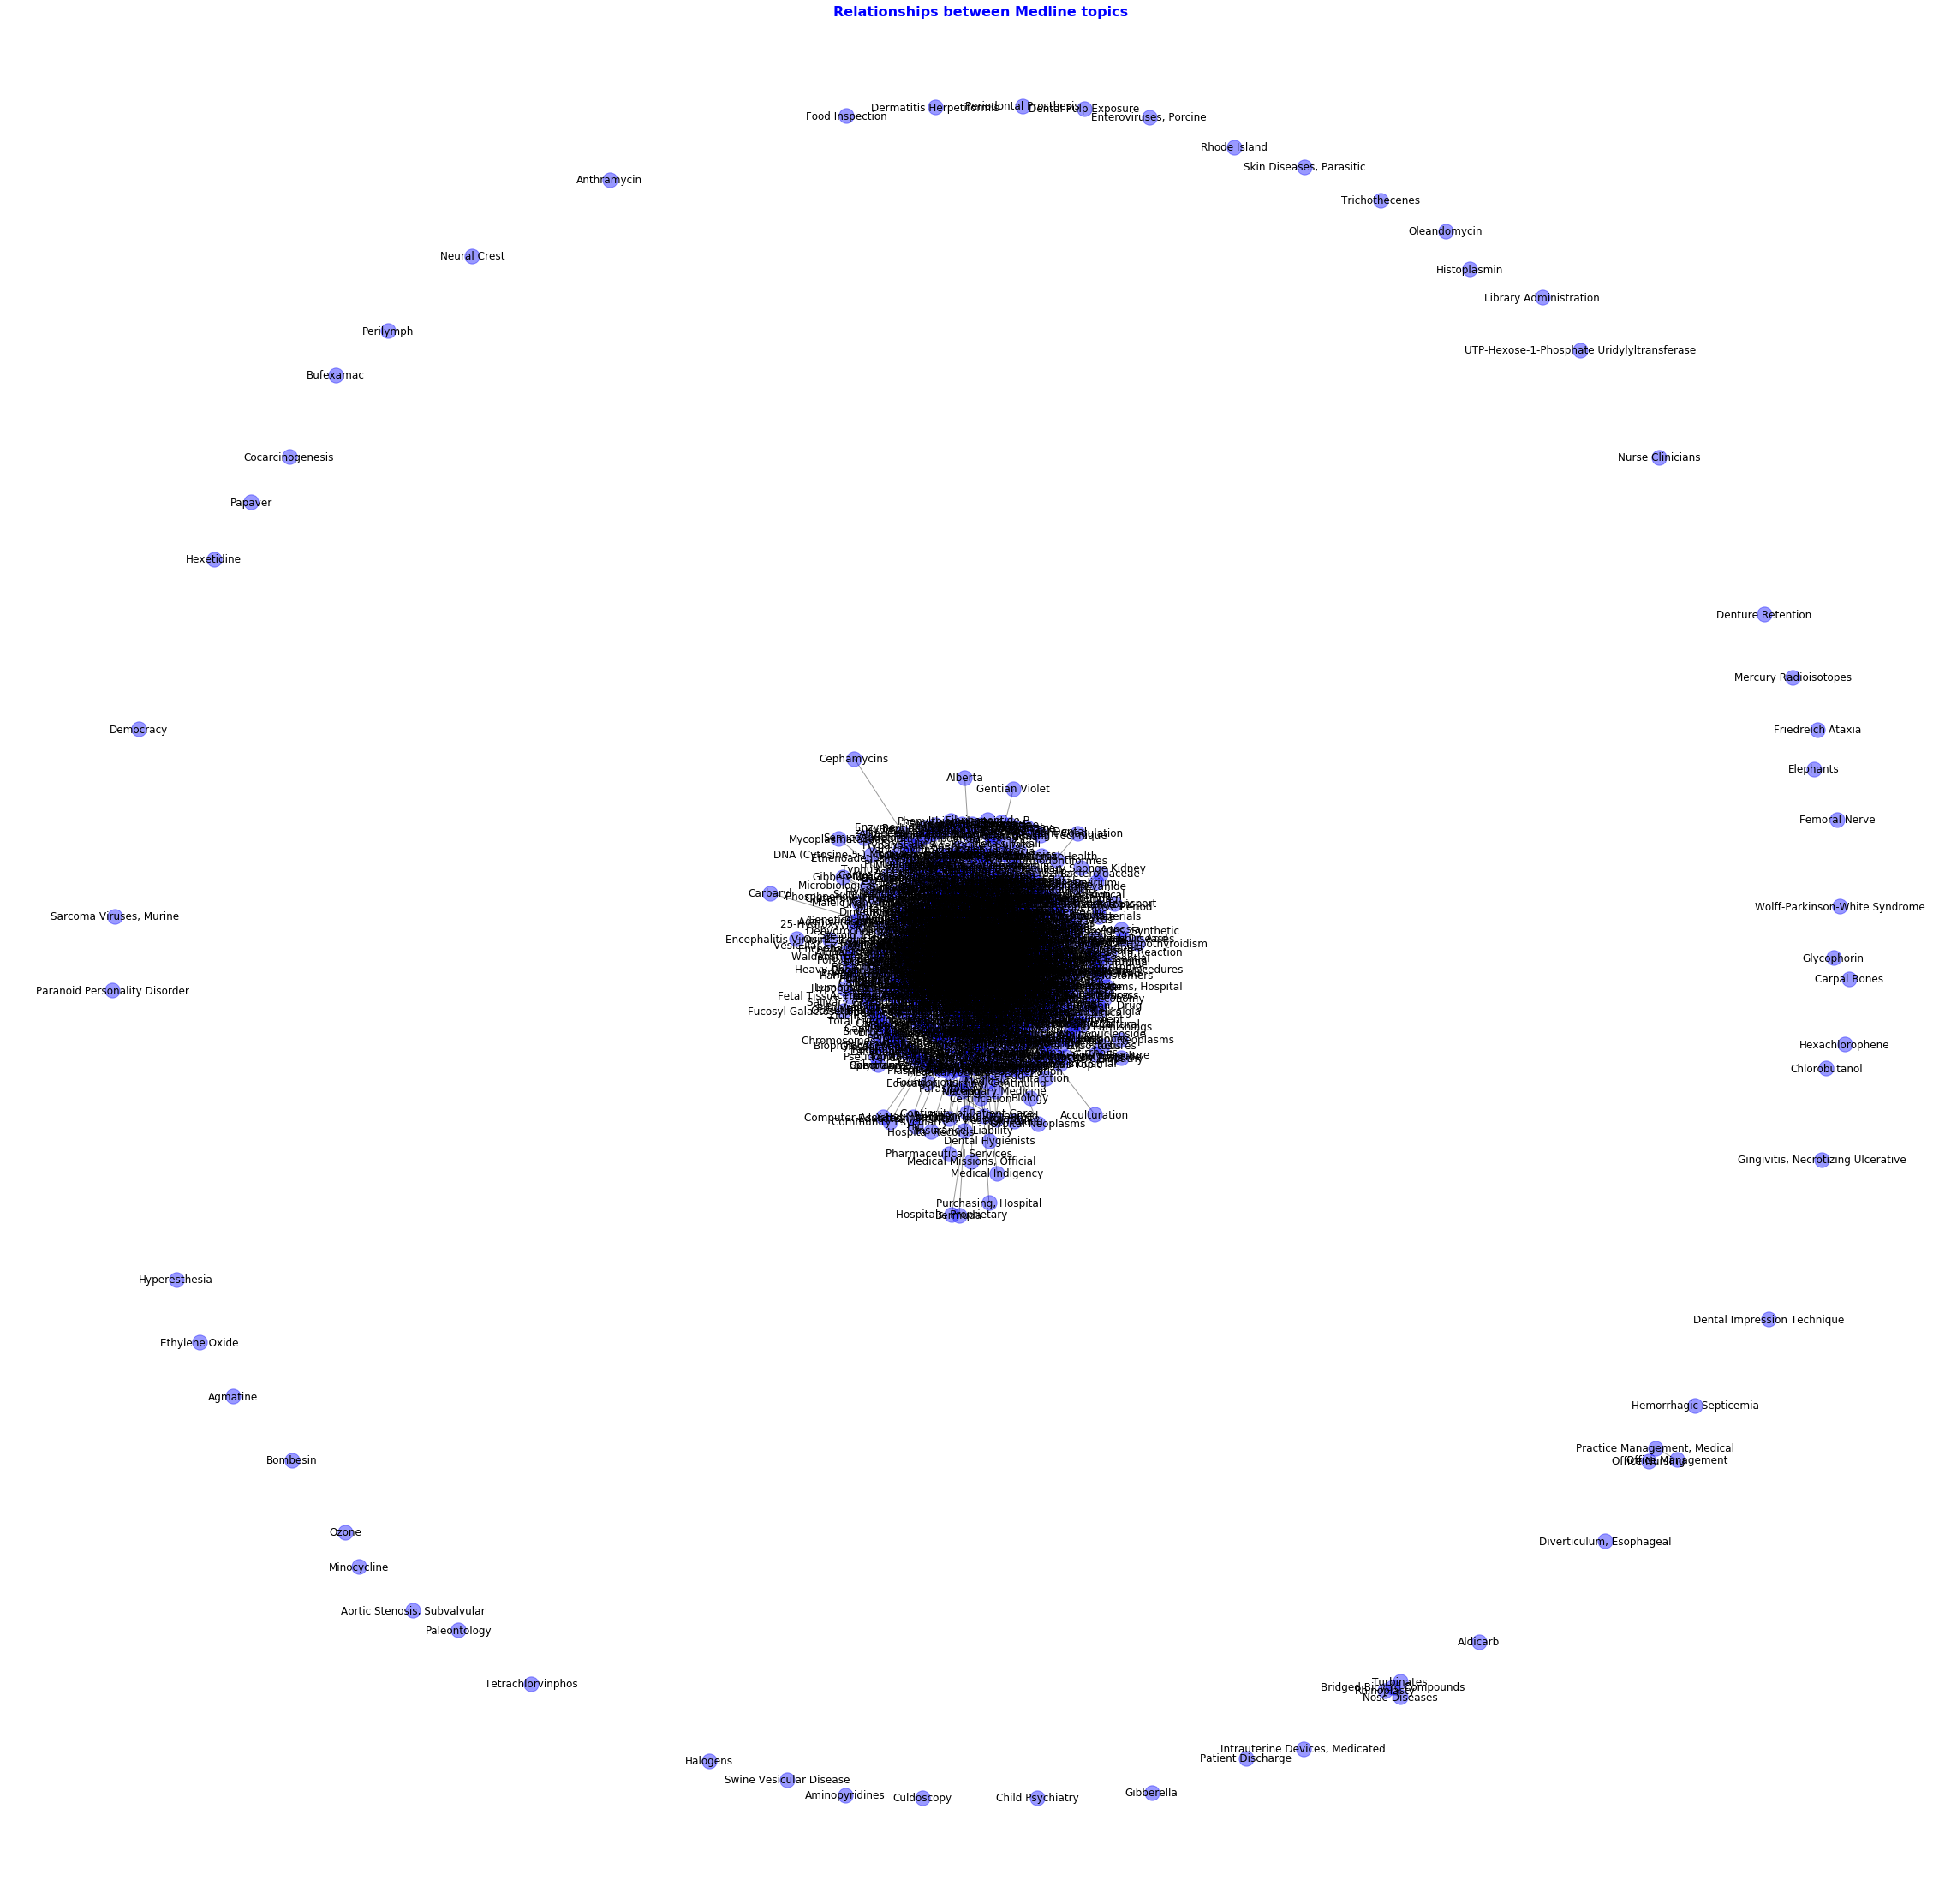

In [17]:
plt.figure(figsize=(40,40))
pos=nx.spring_layout(graph,iterations=400,scale=5,k=.3)
nx.draw_networkx_labels(graph,pos,fontsize=8)
font={'fontname' :'Helvetica',
      'color': 'b',
      'fontweight':'bold',
      'fontsize':16
     }
plt.title('Relationships between Medline topics',font)

nx.draw_networkx_nodes(graph,pos,node_color='b',alpha=.4)
nx.draw_networkx_edges(graph,pos,alpha=.4,node_size=1,width=1,edge_color='k')
plt.axis('off')
plt.savefig('medline_topics_graph.png')
plt.show()

In [23]:
centrality=nx.eigenvector_centrality(graph)
topics_list=[]
for node in centrality:
    topics_list.append((node,centrality[node]))

sorted_topics_list=sorted(topics_list,key=lambda item:item[1],reverse=True)
sorted_topics_list[0:20]

[('Male', 0.33826407857078483),
 ('Kinetics', 0.2616592951107433),
 ('Pregnancy', 0.1984512103294582),
 ('Cattle', 0.18313095842672125),
 ('Molecular Weight', 0.15927307619367784),
 ('Cyclic AMP', 0.1547876526189963),
 ('Solubility', 0.13995669150895465),
 ('Muscles', 0.13887283880110612),
 ('Haplorhini', 0.13637435763844064),
 ('Sheep', 0.1297461146505291),
 ('Antipsychotic Agents', 0.1288559971633264),
 ('Blood Pressure', 0.1272586935184765),
 ('Biological Transport', 0.12047639281174104),
 ('Graft vs Host Reaction', 0.09428314766464083),
 ('Imidazoles', 0.09230669955975615),
 ('Synaptic Transmission', 0.09217822992894824),
 ('Light', 0.0914534926559857),
 ('Phospholipids', 0.09002530765229692),
 ('Phentolamine', 0.08998840788469155),
 ('Thermodynamics', 0.08800702863752137)]